In [73]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [74]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
#!python --version

In [76]:
#!pip list

In [77]:
from gensim.models import KeyedVectors
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn import preprocessing
import pycaret
import numpy as np
import pandas as pd
#For Classification
from pycaret.classification import *
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

pd.options.display.max_colwidth = None

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [78]:
df_train = pd.read_csv('/content/drive/MyDrive/CapstoneData/amazon_review_polarity_csv/train_clean_20000.csv')
df_test = pd.read_csv('/content/drive/MyDrive/CapstoneData/amazon_review_polarity_csv/test_clean_4000.csv')
#data = df_train.append(df_test, ignore_index=True)
#data 

In [79]:
#tfidf
X_train = df_train['title+review_clean'].fillna(' ')
X_test = df_test['title+review_clean'].fillna(' ')

tfidf_vectorizer = TfidfVectorizer(max_features=15000, min_df=0.001, ngram_range=(1, 3))

tfidf_train = tfidf_vectorizer.fit(X_train) 
pickle.dump(tfidf_train, open('/content/drive/MyDrive/CapstonePickle/tfidf_vectorizer_fitted.pkl', 'wb'))
tfidf_train = tfidf_vectorizer.transform(X_train) 
tfidf_train = tfidf_train.todense()

tfidf_test = tfidf_vectorizer.transform(X_test)
tfidf_test = tfidf_test.todense()

In [80]:
df_train_word_embed = pd.DataFrame(tfidf_train)
df_train_word_embed['label'] = df_train['label']


df_test_word_embed = pd.DataFrame(tfidf_test)
df_test_word_embed['label'] = df_test['label']

In [82]:
#this was the best model (from 'model results' google sheet), and we now want to pickle the fitted model
#best model

model = LogisticRegression(C=3.882, class_weight={}, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False)

model.fit(np.asarray(tfidf_train), df_train['label'])

LogisticRegression(C=3.882, class_weight={}, max_iter=1000, random_state=123)

In [83]:
pickle.dump(model, open('/content/drive/MyDrive/CapstonePickle/best_model_fitted.pkl', 'wb')) # saved in MyDrive/CapstonePickle

In [ ]:
s = setup(df_train_word_embed, target = 'label', session_id = 123)

,Description,Value
0,Session id,123
1,Target,label
2,Target type,Binary
3,Original data shape,"(20000, 5852)"
4,Transformed data shape,"(20000, 5852)"
5,Transformed train set shape,"(14000, 5852)"
6,Transformed test set shape,"(6000, 5852)"
7,Numeric features,5851
8,Preprocess,True
9,Imputation type,simple


In [ ]:
top_3 = compare_models(n_select = 3, include = ['lr', 'svm', 'ridge','rf'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.8771,0.0000,0.8808,0.8805,0.8803,0.7541,0.7548,4.6080
lr,Logistic Regression,0.8741,0.9472,0.8840,0.8722,0.8780,0.7479,0.7480,5.1500
ridge,Ridge Classifier,0.8722,0.0000,0.8816,0.8709,0.8762,0.7442,0.7444,7.8110
rf,Random Forest Classifier,0.8519,0.9287,0.8628,0.8507,0.8566,0.7036,0.7037,26.9140


Processing:   0%|          | 0/23 [00:00<?, ?it/s]

In [ ]:
top_3

[SGDClassifier(alpha=0.0001, average=False, class_weight=None,
               early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
               l1_ratio=0.15, learning_rate='optimal', loss='hinge',
               max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
               power_t=0.5, random_state=123, shuffle=True, tol=0.001,
               validation_fraction=0.1, verbose=0, warm_start=False),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                 max_iter=None, positive=False, random_state=123, solver='auto',
                 tol=0.0001)]

In [ ]:
pred = [predict_model(i, data=df_test_word_embed) for i in top_3]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8758,0.8758,0.8731,0.8830,0.8780,0.7514,0.7515


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8782,0.9466,0.8931,0.8723,0.8826,0.7562,0.7564


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.8675,0.8672,0.8799,0.8639,0.8719,0.7347,0.7349


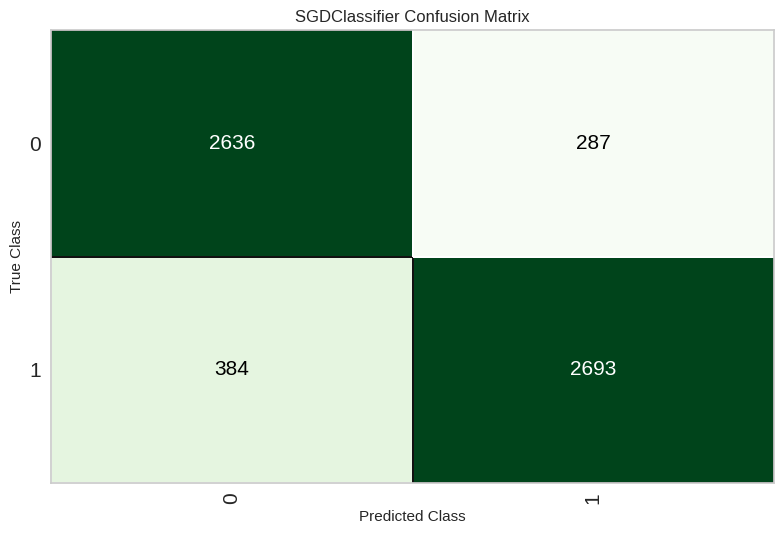

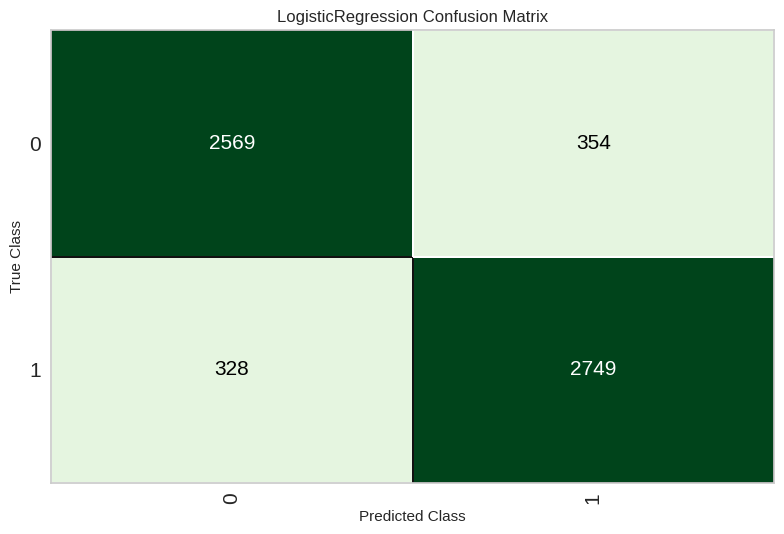

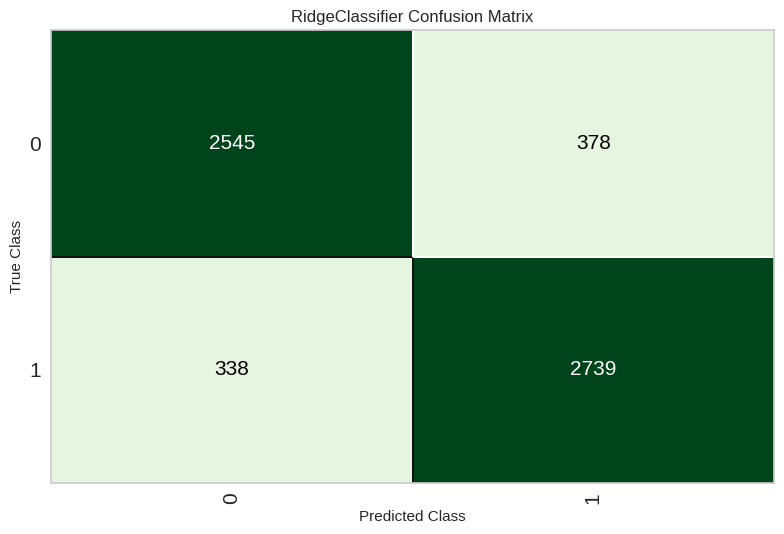

[None, None, None]

In [ ]:
# plot confusion matrix
[plot_model(i, plot = 'confusion_matrix') for i in top_3]

In [ ]:
# plot auc
#[plot_model(i, plot = 'auc') for i in top_3]

In [ ]:
tuned_top_3 = [tune_model(i) for i in top_3] 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8471,0.0000,0.8468,0.8539,0.8503,0.6942,0.6942
1,0.8529,0.0000,0.8635,0.8516,0.8575,0.7054,0.7055
2,0.8443,0.0000,0.8482,0.8482,0.8482,0.6884,0.6884
3,0.8443,0.0000,0.8663,0.8360,0.8509,0.6881,0.6885
4,0.8350,0.0000,0.8357,0.8415,0.8386,0.6698,0.6699
5,0.8650,0.0000,0.8691,0.8679,0.8685,0.7298,0.7298
6,0.8364,0.0000,0.8496,0.8345,0.8420,0.6725,0.6726
7,0.8564,0.0000,0.8705,0.8527,0.8615,0.7125,0.7127
8,0.8493,0.0000,0.8524,0.8536,0.8530,0.6984,0.6984


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8836,0.9481,0.8872,0.8860,0.8866,0.7670,0.7670
1,0.8800,0.9529,0.8942,0.8747,0.8843,0.7597,0.7599
2,0.8864,0.9520,0.8997,0.8813,0.8904,0.7726,0.7728
3,0.8779,0.9468,0.8969,0.8691,0.8828,0.7553,0.7558
4,0.8707,0.9479,0.8733,0.8745,0.8739,0.7413,0.7413
5,0.8914,0.9568,0.9025,0.8877,0.8950,0.7826,0.7827
6,0.8629,0.9364,0.8649,0.8673,0.8661,0.7256,0.7256
7,0.8843,0.9479,0.8983,0.8787,0.8884,0.7683,0.7685
8,0.8814,0.9538,0.8830,0.8855,0.8842,0.7627,0.7627


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8707,0.0000,0.8747,0.8734,0.8740,0.7412,0.7412
1,0.8771,0.0000,0.8858,0.8760,0.8809,0.7541,0.7541
2,0.8800,0.0000,0.8844,0.8819,0.8832,0.7598,0.7598
3,0.8771,0.0000,0.8997,0.8660,0.8825,0.7539,0.7545
4,0.8736,0.0000,0.8844,0.8711,0.8777,0.7469,0.7470
5,0.8943,0.0000,0.9109,0.8862,0.8984,0.7883,0.7886
6,0.8514,0.0000,0.8552,0.8552,0.8552,0.7027,0.7027
7,0.8807,0.0000,0.8900,0.8790,0.8844,0.7612,0.7613
8,0.8764,0.0000,0.8788,0.8801,0.8794,0.7527,0.7527


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
tuned_top_3

[SGDClassifier(alpha=0.0001, average=False, class_weight=None,
               early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
               l1_ratio=0.15, learning_rate='optimal', loss='hinge',
               max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
               power_t=0.5, random_state=123, shuffle=True, tol=0.001,
               validation_fraction=0.1, verbose=0, warm_start=False),
 LogisticRegression(C=3.882, class_weight={}, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 RidgeClassifier(alpha=5.21, class_weight=None, copy_X=True, fit_intercept=False,
                 max_iter=None, positive=False, random_state=123, solver='auto',
                 tol=0.0001)]

In [ ]:
tuned_pred = [predict_model(i, data=df_test_word_embed) for i in tuned_top_3]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8758,0.8758,0.8731,0.8830,0.8780,0.7514,0.7515


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8745,0.9477,0.8902,0.8682,0.8790,0.7487,0.7489


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.8745,0.8741,0.8892,0.8689,0.8789,0.7487,0.7489


In [ ]:
tuned_pred


[        0    1    2    3    4    5    6    7    8    9  ...  5843  5844  5845  \
 0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
 1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
 2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
 3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
 4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
 ...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
 3995  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
 3996  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
 3997  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
 3998  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
 3999  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
 
       5846  5